**Importing Library**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
# plt.style.use("dark_background")

In [3]:
import os
os.listdir('./dataset')

['alien_test', 'cloudy', 'foggy', 'rainy', 'shine', 'sunrise', 'test.csv']

**Loading Images**

In [4]:
from PIL import Image

def load_images(path):
    imgs = list()
    label = list()
    
    for folder in os.listdir(path):
        if folder not in ['alien_test', 'test.csv']:
            subpath = path + '/' + folder
            for image in os.listdir(subpath):
                img = Image.open(subpath + '/' + image).convert('RGB')
                img = img.resize(size=(32, 32))
                imgs.append(np.array(img))
                label.append(folder)
                del img
    
    plt.figure(figsize = (5, 5))
    for i in range(20):
        plt.subplot(5, 4, i+1)
        plt.imshow(imgs[i], cmap="gray")
        plt.axis('off')
    plt.show()
    return np.array(imgs), label

# Dataset Pre-Processing

**Fetching Images & Applying Normalization on Images**

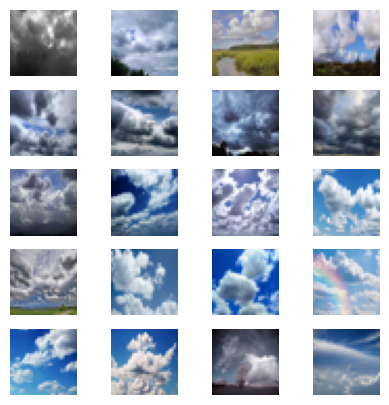

((1500, 32, 32, 3), 1500)

In [5]:
x, y = load_images('./dataset')
x = x/255.0
x.shape, len(y)

**Reshaping all the images**

In [6]:
nsamples, nx, ny, nrgb = x.shape
x_new = x.reshape((nsamples, nx * ny * nrgb))
x_new.shape

(1500, 3072)

**Applying Label Encoding**

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_new = label_encoder.fit_transform(y)
x_new.shape, y_new.shape

((1500, 3072), (1500,))

**Split Dataset into training & testing data**

In [8]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x_new, y_new, test_size=0.01, random_state=42)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((1485, 3072), (15, 3072), (1485,), (15,))

**plot sample data**

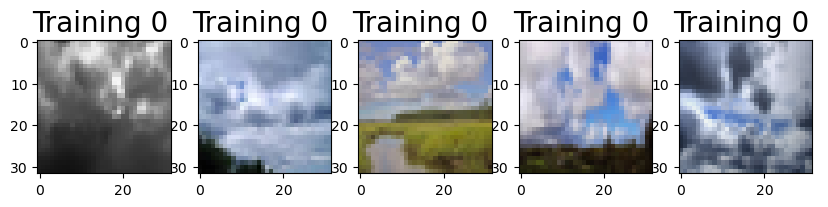

In [9]:
plt.figure(figsize = (10, 10))
for index, (image, label) in enumerate(zip(x_new[:5], y_new[:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (32, 32, 3)))
    plt.title('Training %d ' % label, fontsize=20)
    plt.plot

# Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

**solver = "newton-cg"**

In [11]:
lgr_newton = LogisticRegression(solver="newton-cg")
lgr_newton.fit(train_x, train_y)
print("Actual  -", test_y)
print("Predict -", lgr_newton.predict(test_x))
print("Accuracy-", lgr_newton.score(test_x, test_y))

Actual  - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predict - [3 4 1 1 1 0 3 1 4 0 0 4 0 4 0]
Accuracy- 0.7333333333333333


In [12]:
# Classification Report
print(classification_report(test_y, lgr_newton.predict(test_x)))

              precision    recall  f1-score   support

           0       0.40      1.00      0.57         2
           1       0.75      1.00      0.86         3
           2       0.00      0.00      0.00         4
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         4

    accuracy                           0.73        15
   macro avg       0.63      0.80      0.69        15
weighted avg       0.60      0.73      0.65        15



c:\Users\shiva\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\shiva\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\shiva\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
# plotting confusion matrix
cm = confusion_matrix(test_y, lgr_newton.predict(test_x))
TN = cm[0][0]
FN = cm[1][0]
FP = cm[0][1]
TP = cm[1][1]
print(cm)
print('The model testing accuracy = {}'.format((TP+TN)/(TP+TN+FN+FP)))

[[2 0 0 0 0]
 [0 3 0 0 0]
 [3 1 0 0 0]
 [0 0 0 2 0]
 [0 0 0 0 4]]
The model testing accuracy = 1.0


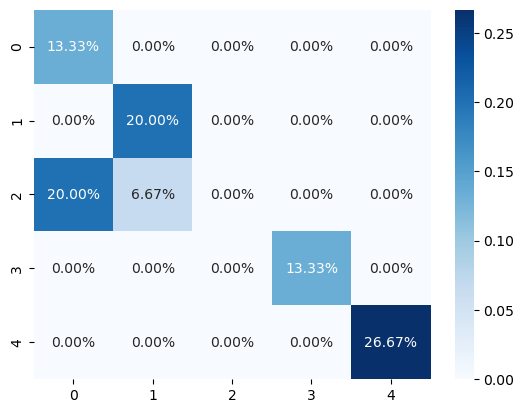

In [14]:
# plotting Heatmap
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
plt.show()

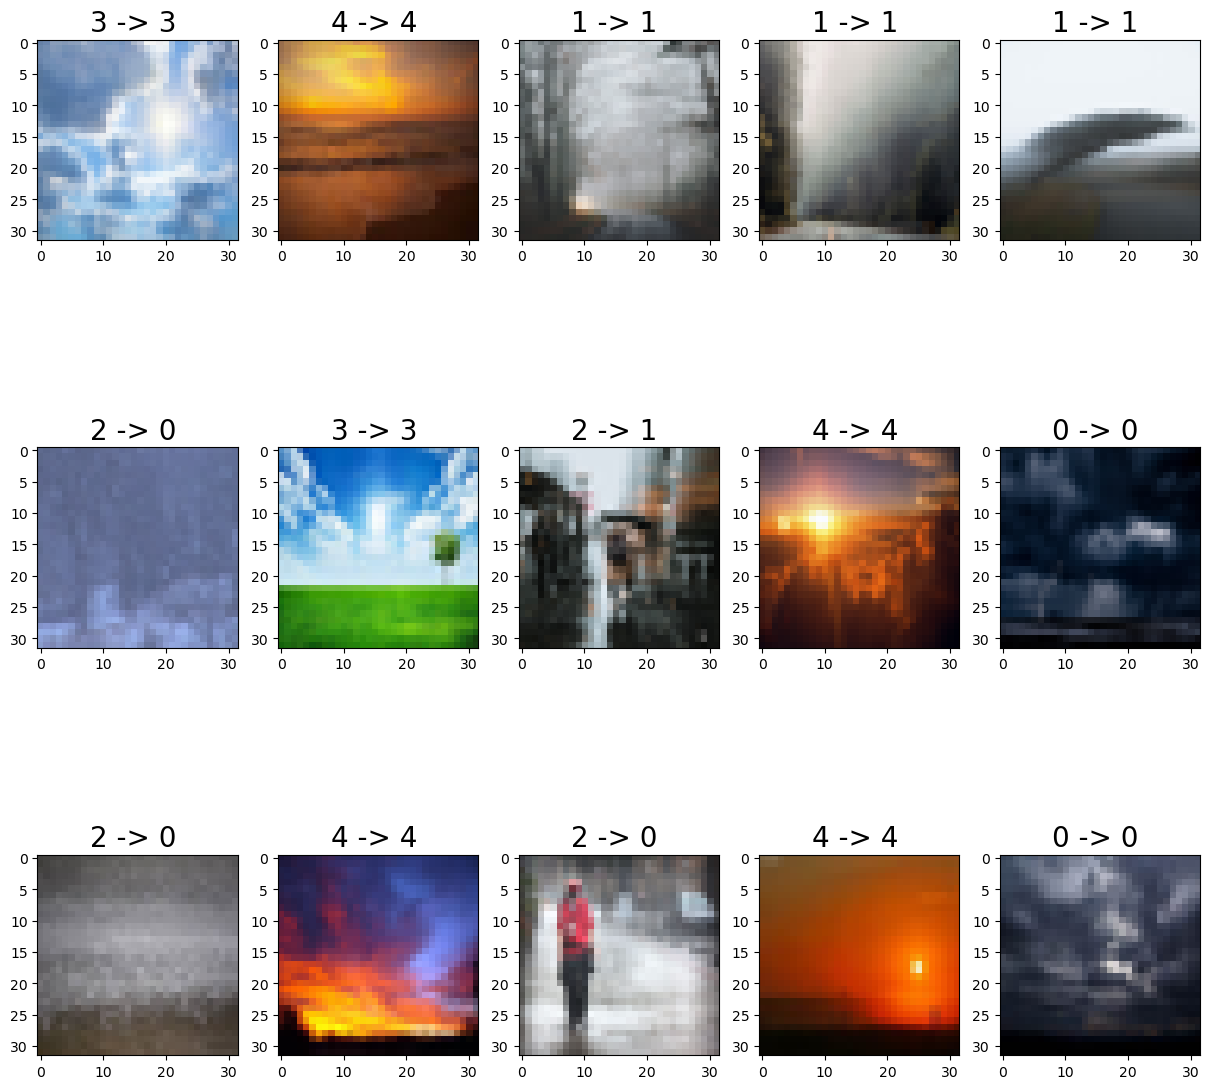

In [15]:
plt.figure(figsize = (15, 15))
for index, (image, actual, pred) in enumerate(zip(test_x, test_y, lgr_newton.predict(test_x))):
    plt.subplot(3, 5, index+1)
    plt.imshow(np.reshape(image, (32, 32, 3)))
    plt.title('%d -> %d ' % (actual, pred), fontsize=20)
    plt.plot

**solver = "lbfgs"**

In [16]:
lgr_lbfgs = LogisticRegression(solver="lbfgs")
lgr_lbfgs.fit(train_x, train_y)
print("Actual  -", test_y)
print("Predict -", lgr_lbfgs.predict(test_x))
print("Accuracy-", lgr_lbfgs.score(test_x, test_y))

Actual  - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predict - [3 4 2 1 1 2 3 1 4 0 0 4 2 4 0]
Accuracy- 0.8


c:\Users\shiva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


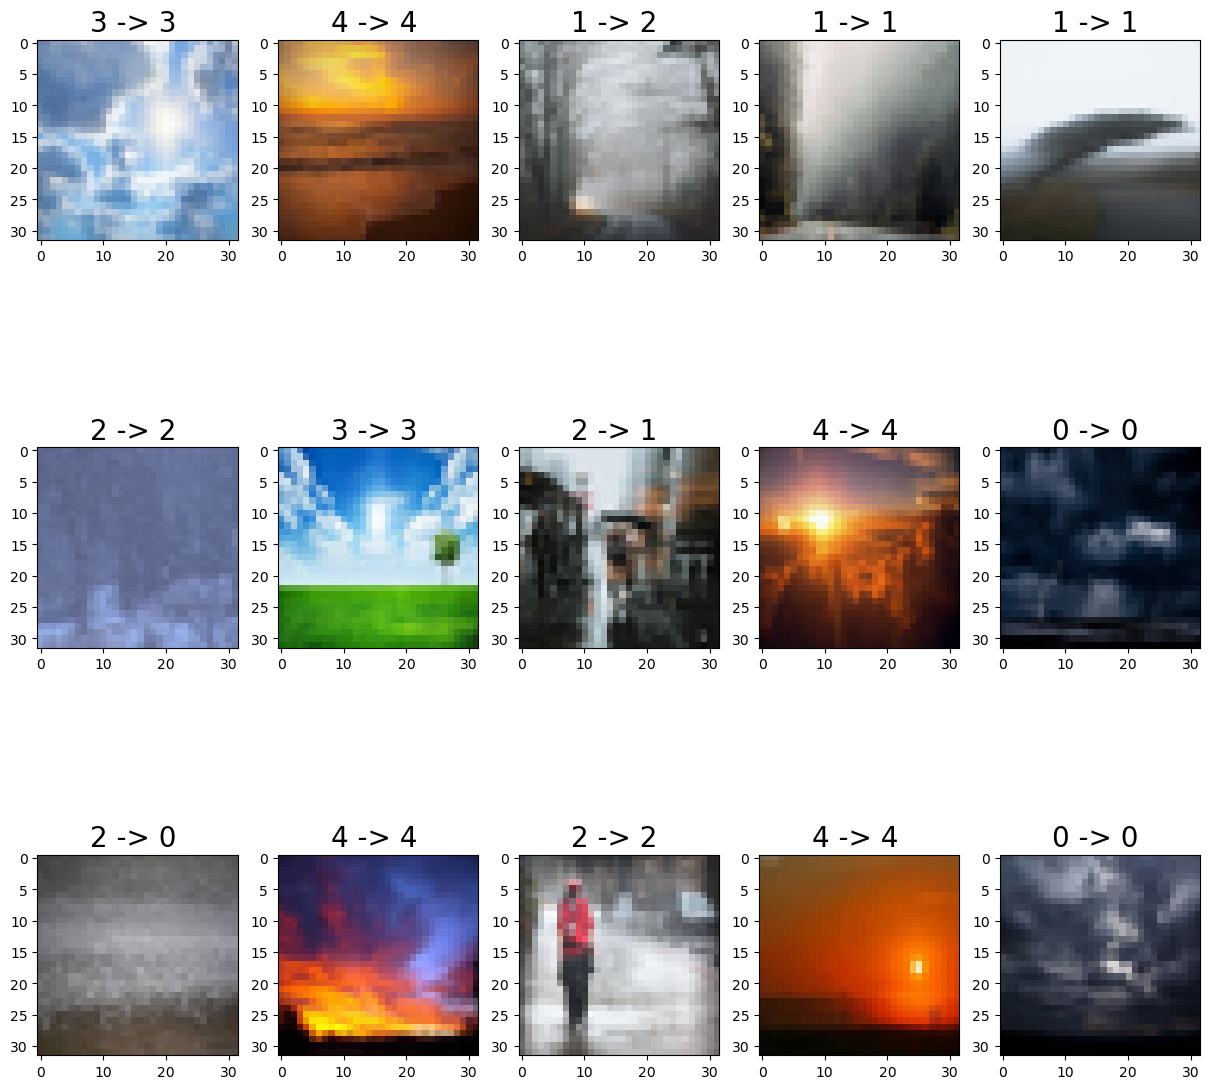

In [17]:
plt.figure(figsize = (15, 15))
for index, (image, actual, pred) in enumerate(zip(test_x, test_y, lgr_lbfgs.predict(test_x))):
    plt.subplot(3, 5, index+1)
    plt.imshow(np.reshape(image, (32, 32, 3)))
    plt.title('%d -> %d ' % (actual, pred), fontsize=20)
    plt.plot

**solver = "liblinear"**

In [18]:
lgr_liblinear = LogisticRegression(solver="liblinear")
lgr_liblinear.fit(train_x, train_y)
print("Actual Result -", test_y)
print("Predicted Result -", lgr_liblinear.predict(test_x))
print("Accuracy -", lgr_liblinear.score(test_x, test_y))

Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted Result - [3 4 2 1 1 2 3 1 4 0 0 4 0 4 0]
Accuracy - 0.7333333333333333


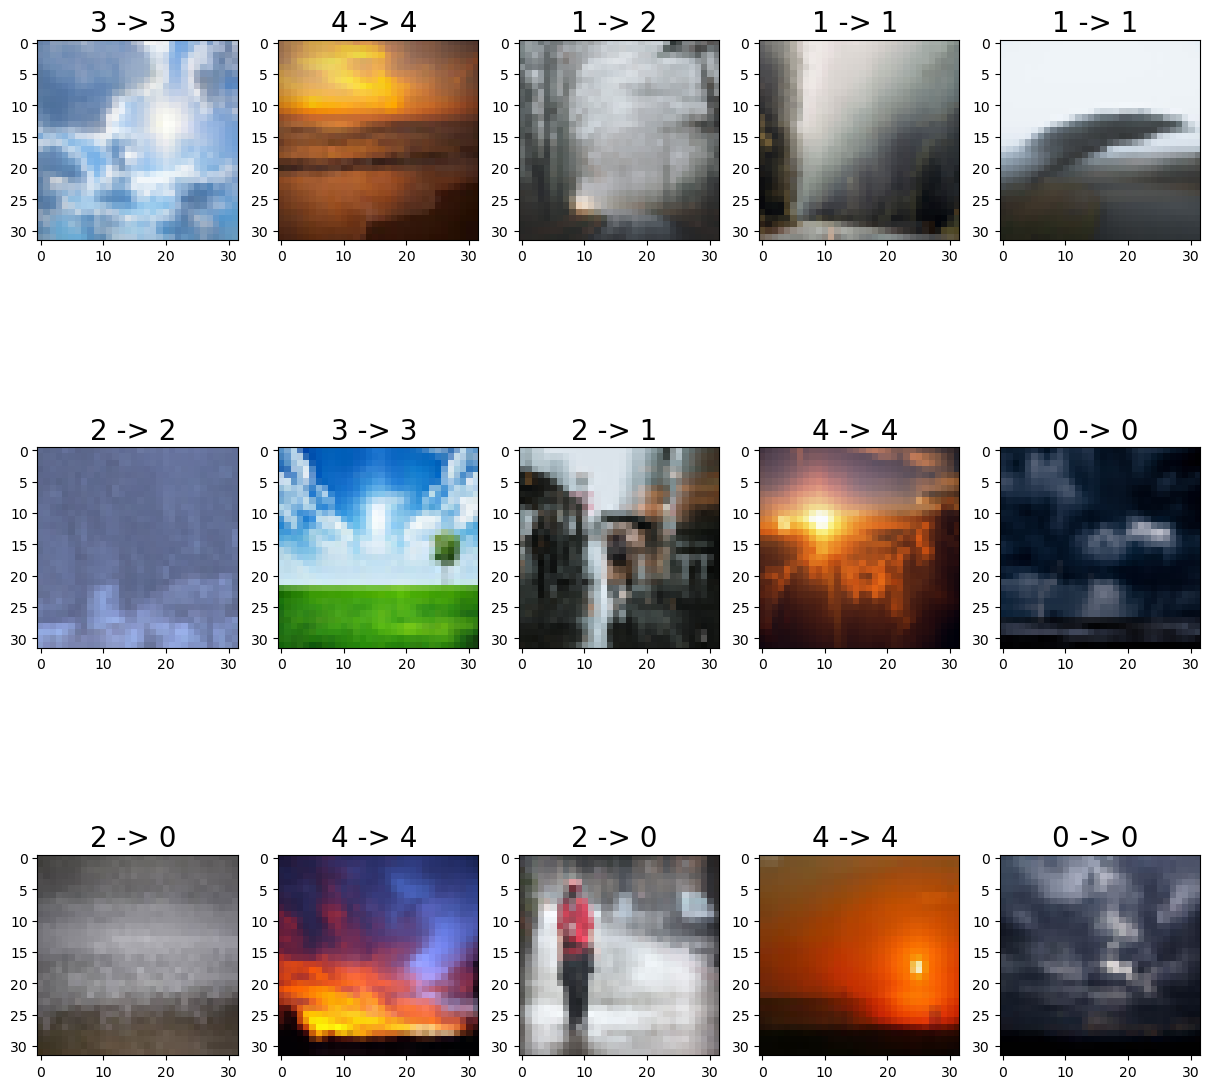

In [19]:
plt.figure(figsize = (15, 15))
for index, (image, actual, pred) in enumerate(zip(test_x, test_y, lgr_liblinear.predict(test_x))):
    plt.subplot(3, 5, index+1)
    plt.imshow(np.reshape(image, (32, 32, 3)))
    plt.title('%d -> %d ' % (actual, pred), fontsize=20)
    plt.plot

**solver = "sag"**

In [20]:
lgr_sag = LogisticRegression(solver="sag")
lgr_sag.fit(train_x, train_y)
print("Actual Result -", test_y)
print("Predicted Result -", lgr_sag.predict(test_x))
print("Accuracy -", lgr_sag.score(test_x, test_y))

Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted Result - [3 4 1 1 1 2 3 1 4 0 0 4 0 4 0]
Accuracy - 0.8


c:\Users\shiva\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


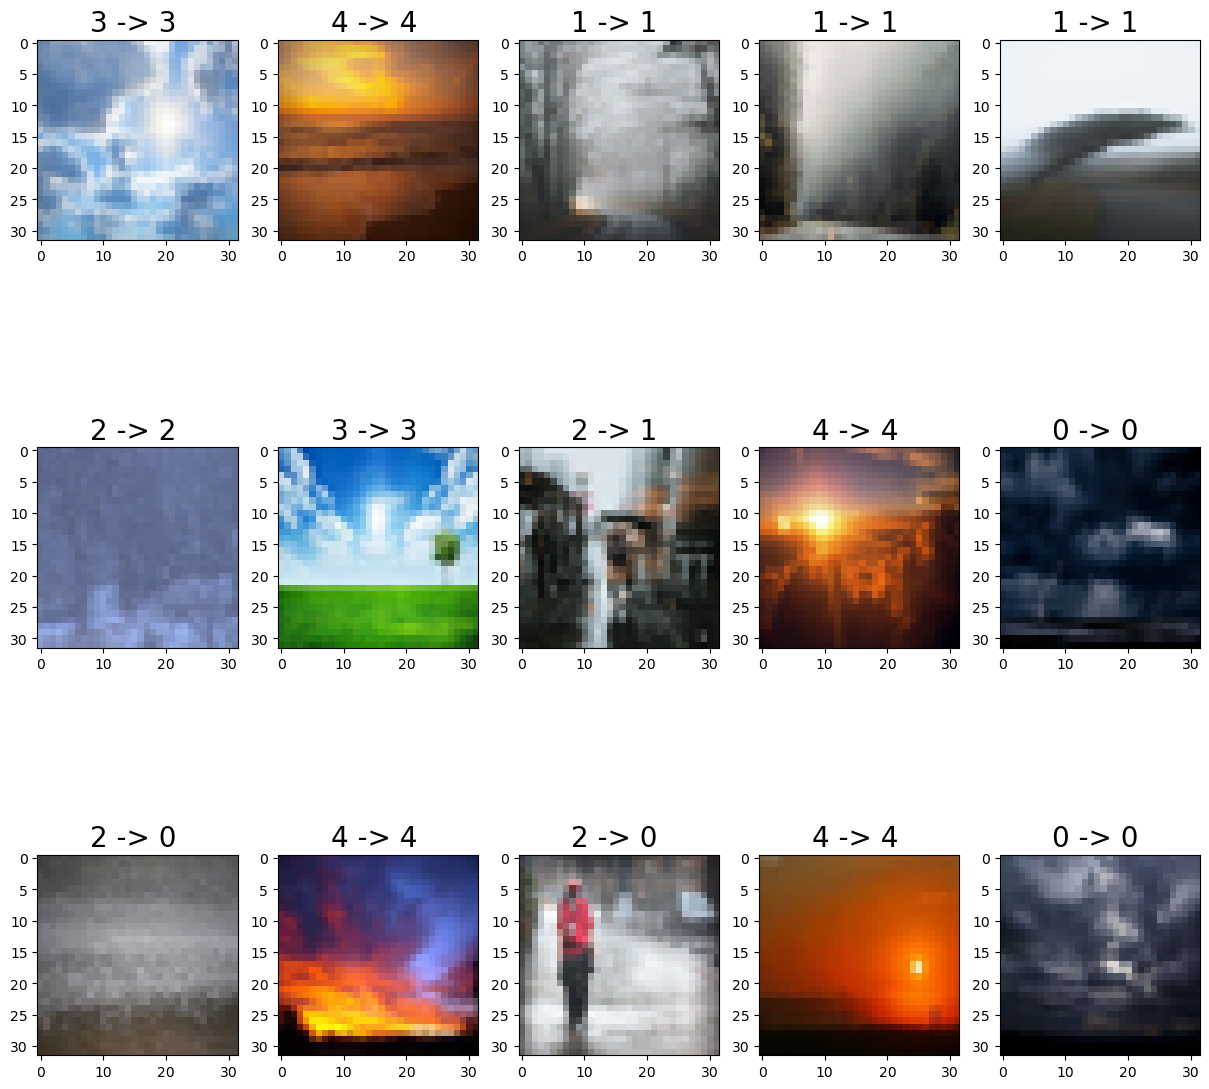

In [21]:
plt.figure(figsize = (15, 15))
for index, (image, actual, pred) in enumerate(zip(test_x, test_y, lgr_sag.predict(test_x))):
    plt.subplot(3, 5, index+1)
    plt.imshow(np.reshape(image, (32, 32, 3)))
    plt.title('%d -> %d ' % (actual, pred), fontsize=20)
    plt.plot

**solver = "saga"**

In [22]:
lgr_saga = LogisticRegression(solver="saga")
lgr_saga.fit(train_x, train_y)
print("Actual Result -", test_y)
print("Predicted Result -", lgr_saga.predict(test_x))
print("Accuracy -", lgr_saga.score(test_x, test_y))

Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted Result - [3 4 1 1 1 2 3 1 4 0 0 4 2 4 0]
Accuracy - 0.8666666666666667


c:\Users\shiva\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


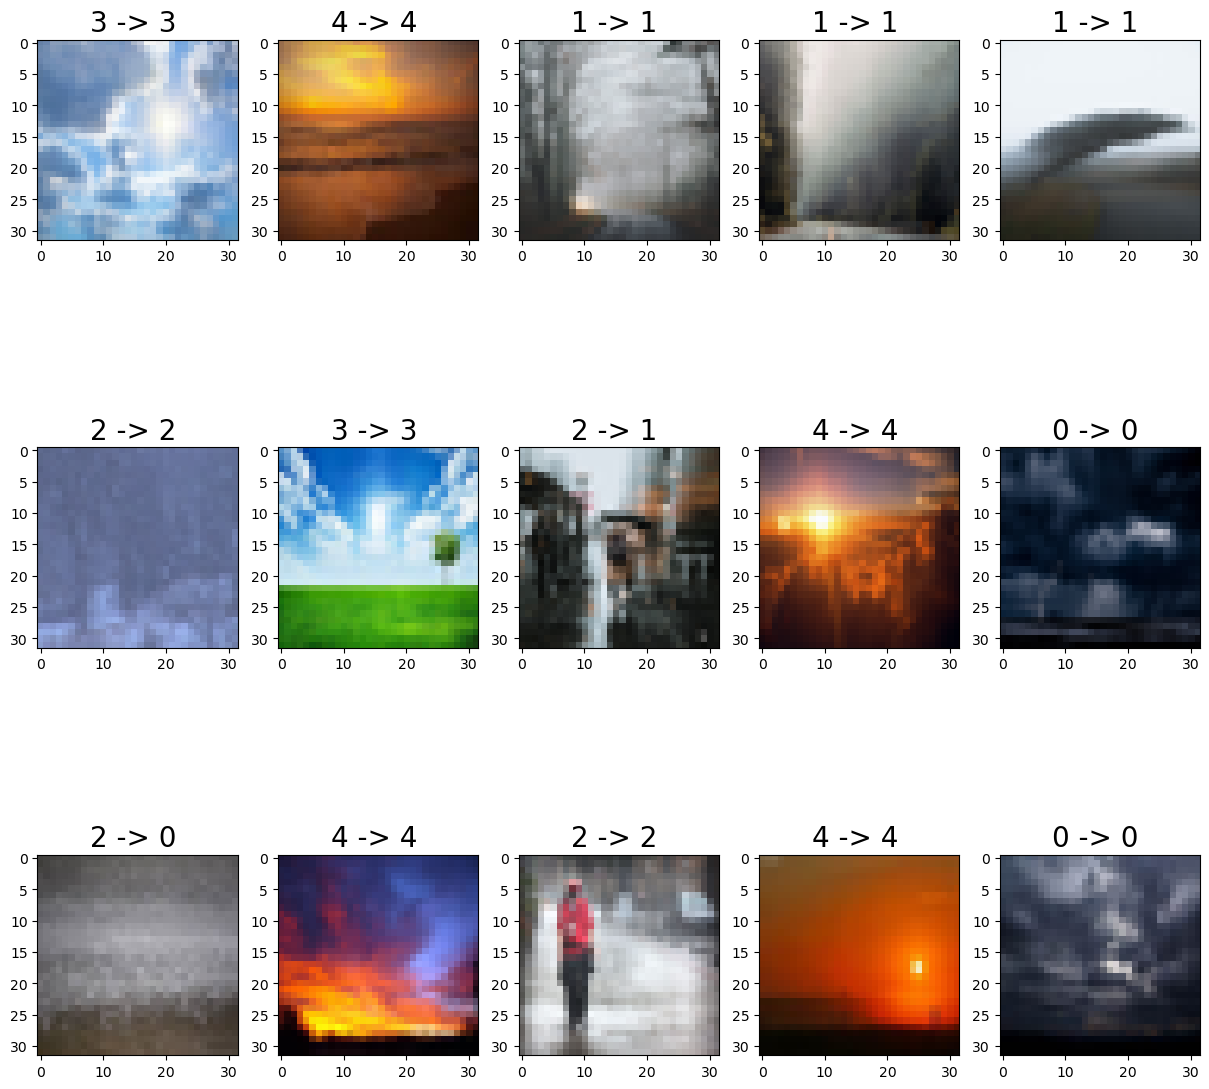

In [23]:
plt.figure(figsize = (15, 15))
for index, (image, actual, pred) in enumerate(zip(test_x, test_y, lgr_saga.predict(test_x))):
    plt.subplot(3, 5, index+1)
    plt.imshow(np.reshape(image, (32, 32, 3)))
    plt.title('%d -> %d ' % (actual, pred), fontsize=20)
    plt.plot

# Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dtc = DecisionTreeClassifier()
dtc.fit(train_x, train_y)
print("Actual Result -", test_y)
print("Predicted Result -", dtc.predict(test_x))
print("Accuracy -", dtc.score(test_x, test_y))

Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted Result - [0 4 1 0 3 0 3 1 4 2 2 4 4 4 4]
Accuracy - 0.4666666666666667


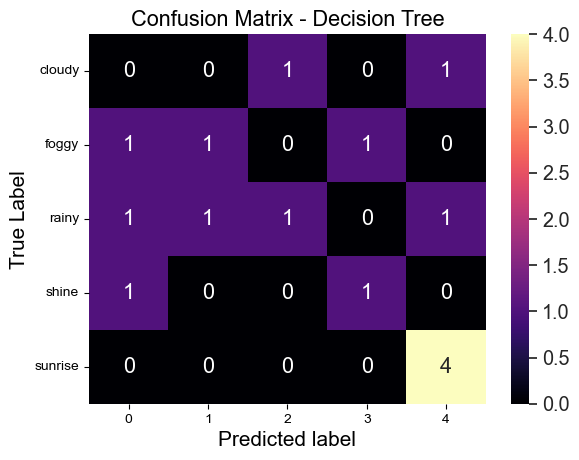

<Figure size 1000x700 with 0 Axes>

In [26]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

#get the confusion matrix
labels = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']

confusion_matrix = confusion_matrix(test_y, dtc.predict(test_x)) #turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)  #plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10, 7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")    #set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
# ax.set_xticklabels(['']+labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

In [27]:
# classifiaction report
print(classification_report(test_y, dtc.predict(test_x)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      0.33      0.40         3
           2       0.50      0.25      0.33         4
           3       0.50      0.50      0.50         2
           4       0.67      1.00      0.80         4

    accuracy                           0.47        15
   macro avg       0.43      0.42      0.41        15
weighted avg       0.48      0.47      0.45        15



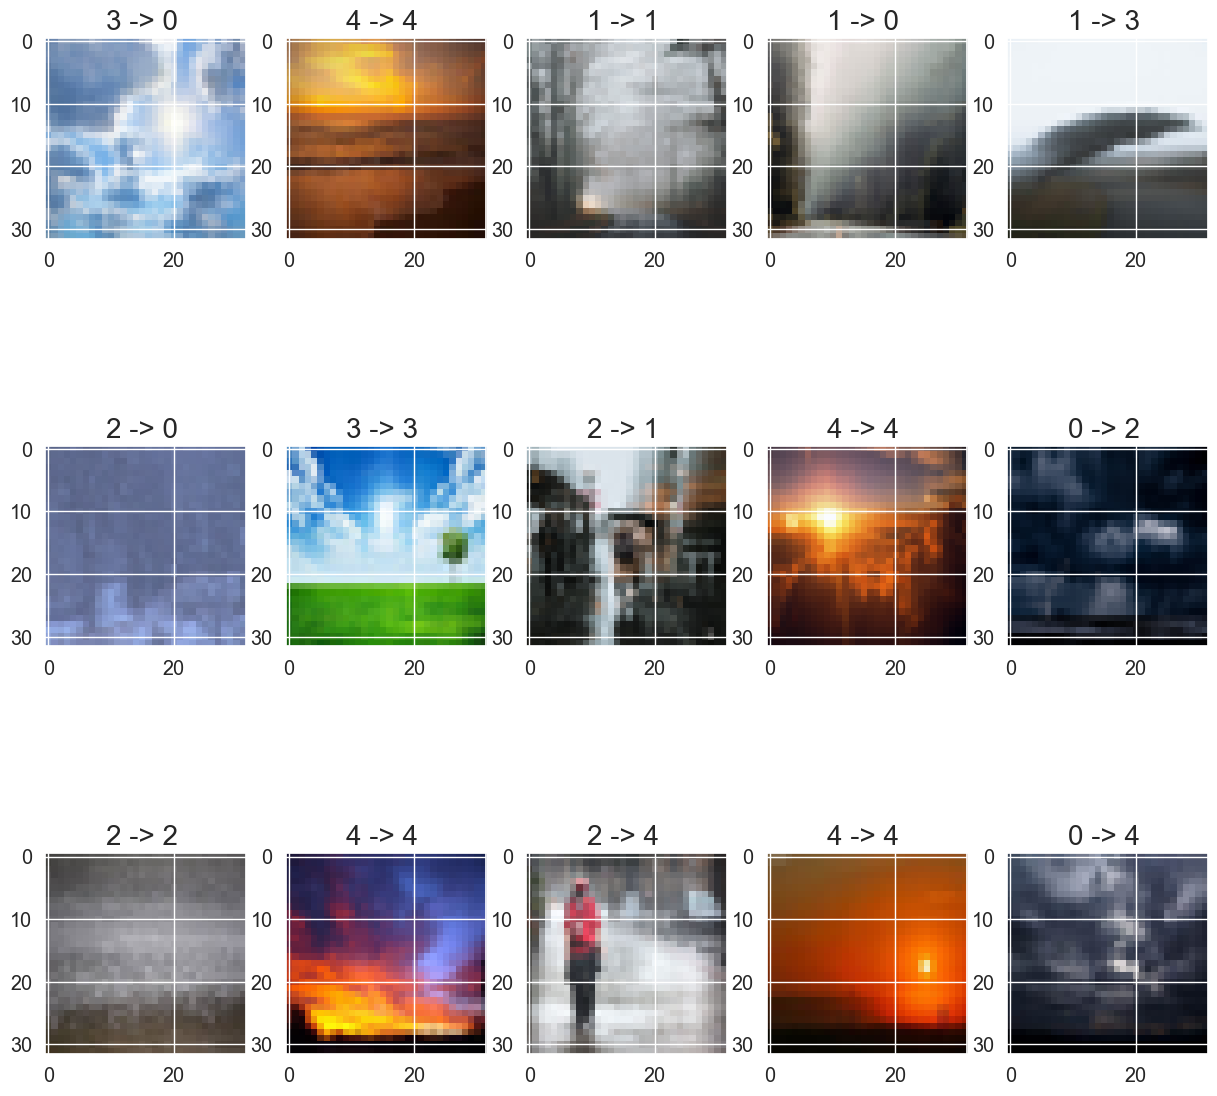

In [28]:
plt.figure(figsize = (15, 15))
for index, (image, actual, pred) in enumerate(zip(test_x, test_y, dtc.predict(test_x))):
    plt.subplot(3, 5, index+1)
    plt.imshow(np.reshape(image, (32, 32, 3)))
    plt.title('%d -> %d ' % (actual, pred), fontsize=20)
    plt.plot

# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rfc = RandomForestClassifier()
rfc.fit(train_x, train_y)
print("Actual Result -", test_y)
print("Predicted Result -", rfc.predict(test_x))
print("Accuracy -", rfc.score(test_x, test_y))

Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted Result - [3 4 1 1 1 2 3 1 4 2 2 4 2 4 0]
Accuracy - 0.8666666666666667


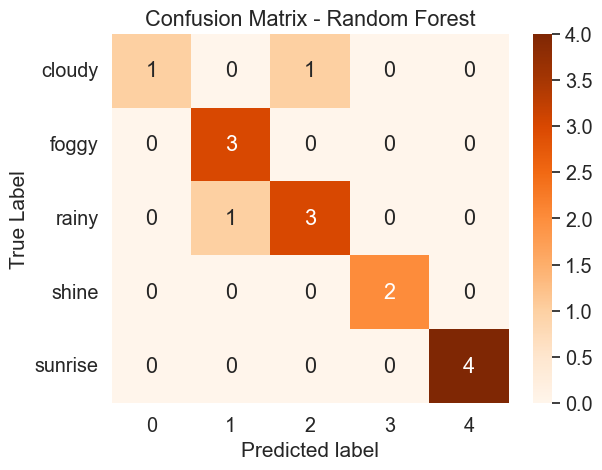

<Figure size 1000x700 with 0 Axes>

In [31]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

#get the confusion matrix
labels = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']

confusion_matrix = confusion_matrix(test_y, rfc.predict(test_x)) #turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)  #plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10, 7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="Oranges")    #set axis titles
ax.set_title('Confusion Matrix - Random Forest')
ax.set_xlabel("Predicted label", fontsize =15)
# ax.set_xticklabels(['']+labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

In [32]:
# classifiaction report
print(classification_report(test_y, rfc.predict(test_x)))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.75      1.00      0.86         3
           2       0.75      0.75      0.75         4
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         4

    accuracy                           0.87        15
   macro avg       0.90      0.85      0.85        15
weighted avg       0.88      0.87      0.86        15



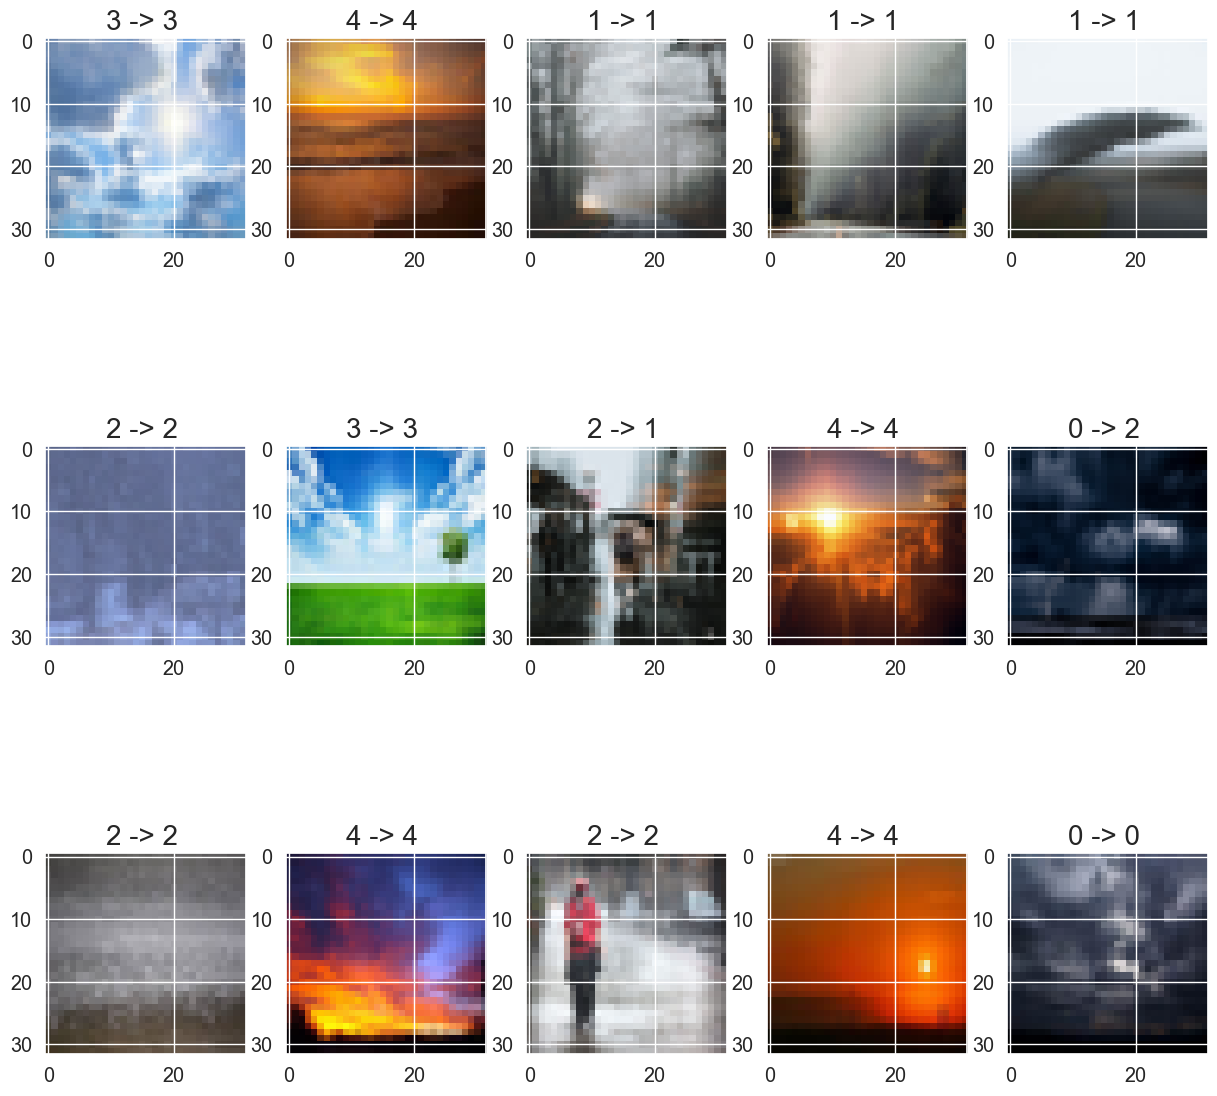

In [33]:
plt.figure(figsize = (15, 15))
for index, (image, actual, pred) in enumerate(zip(test_x, test_y, rfc.predict(test_x))):
    plt.subplot(3, 5, index+1)
    plt.imshow(np.reshape(image, (32, 32, 3)))
    plt.title('%d -> %d ' % (actual, pred), fontsize=20)
    plt.plot

# Support Vector Machine (SVM)

**kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} default='rbf'**

In [34]:
from sklearn.svm import SVC

In [35]:
svc_linear = SVC(C=1, kernel='linear', gamma='auto')
svc_linear.fit(train_x, train_y)
print("Actual Result -", test_y)
print("Predicted Result -", svc_linear.predict(test_x))
print("Accuracy -", svc_linear.score(test_x, test_y))

Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted Result - [3 4 1 1 1 0 3 1 4 1 2 4 0 4 0]
Accuracy - 0.7333333333333333


**kernel='poly'**

In [36]:
svc_poly = SVC(C=1, kernel='poly', gamma='auto')
svc_poly.fit(train_x, train_y)
print("Actual Result -", test_y)
print("Predicted Result -", svc_poly.predict(test_x))
print("Accuracy -", svc_poly.score(test_x, test_y))

Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted Result - [3 4 0 2 1 2 3 4 4 4 4 4 2 4 4]
Accuracy - 0.6


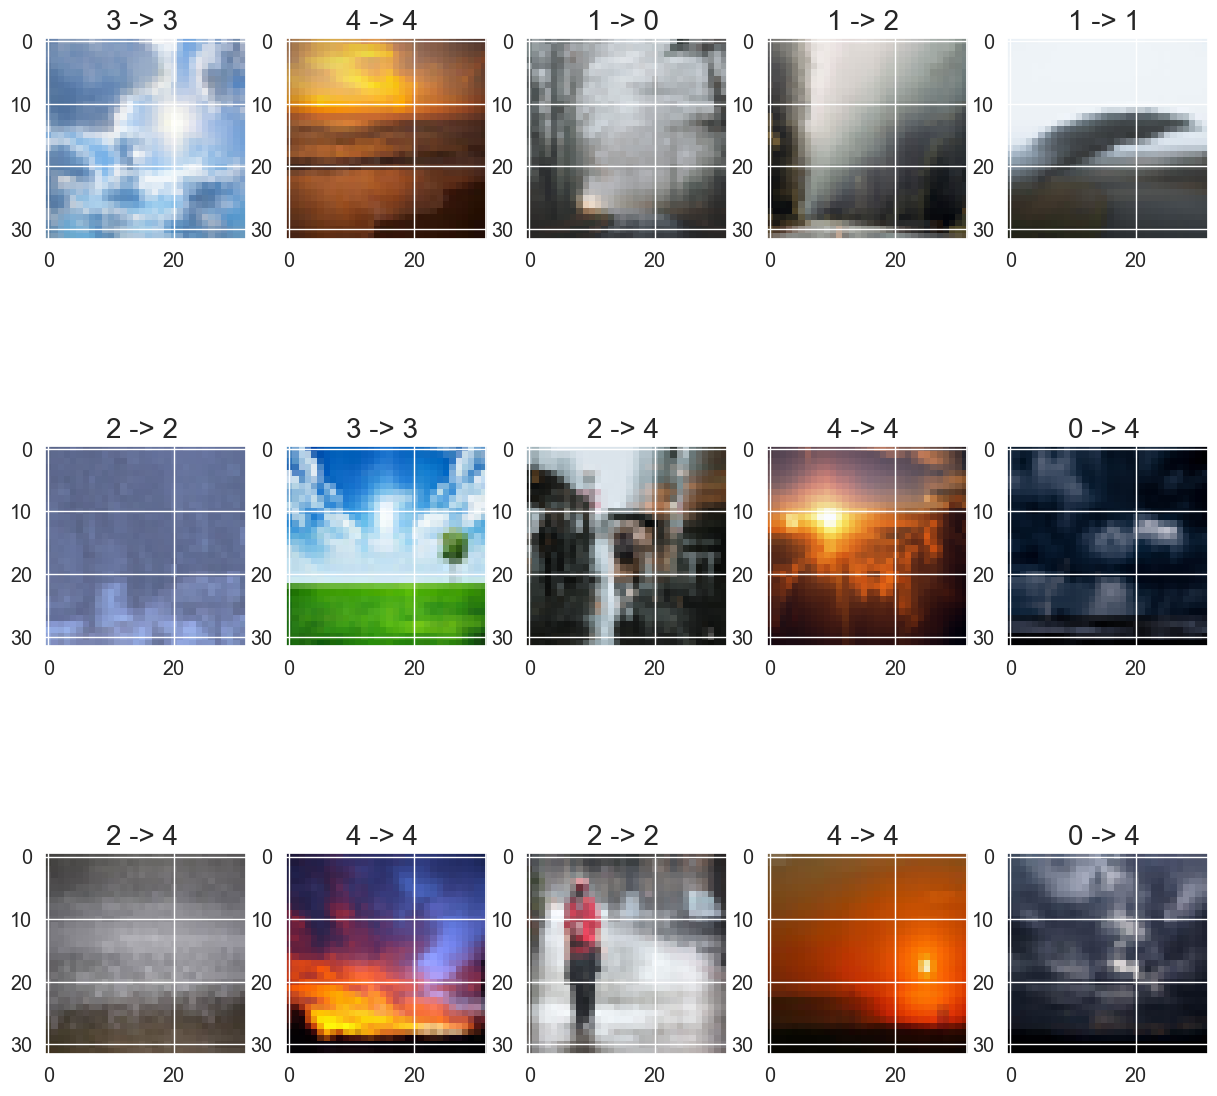

In [37]:
plt.figure(figsize = (15, 15))
for index, (image, actual, pred) in enumerate(zip(test_x, test_y, svc_poly.predict(test_x))):
    plt.subplot(3, 5, index+1)
    plt.imshow(np.reshape(image, (32, 32, 3)))
    plt.title('%d -> %d ' % (actual, pred), fontsize=20)
    plt.plot

In [38]:
svc_rbf = SVC(C=1, kernel='rbf', gamma='auto')
svc_rbf.fit(train_x, train_y)
print("Actual Result -", test_y)
print("Predicted Result -", svc_rbf.predict(test_x))
print("Accuracy -", svc_rbf.score(test_x, test_y))

Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted Result - [3 4 1 1 1 2 3 1 4 2 0 4 2 4 0]
Accuracy - 0.8


In [39]:
svc_sigmoid = SVC(C=1, kernel='sigmoid', gamma='auto')
svc_sigmoid.fit(train_x, train_y)
print("Actual Result -", test_y)
print("Predicted Result -", svc_sigmoid.predict(test_x))
print("Accuracy -", svc_sigmoid.score(test_x, test_y))

Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted Result - [3 4 1 1 1 2 3 1 4 2 0 4 2 4 0]
Accuracy - 0.8


# Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB

In [41]:
nb = GaussianNB()
nb.fit(train_x, train_y)
print("Actual Result -", test_y)
print("Predicted Result -", nb.predict(test_x))
print("Accuracy -", nb.score(test_x, test_y))

Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted Result - [3 4 1 1 1 2 3 1 4 4 0 4 3 4 4]
Accuracy - 0.6666666666666666


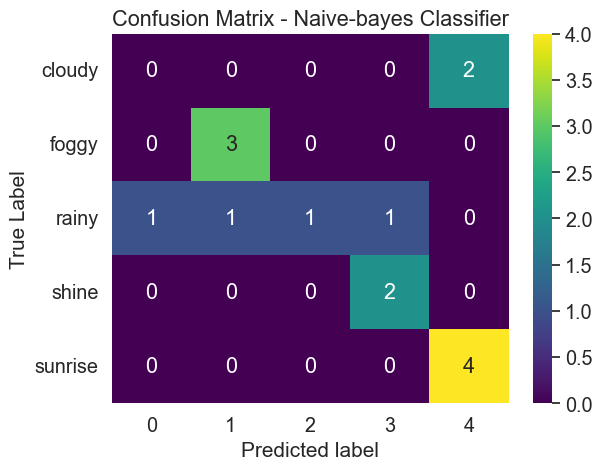

<Figure size 1000x700 with 0 Axes>

In [42]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

#get the confusion matrix
labels = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']

confusion_matrix = confusion_matrix(test_y, nb.predict(test_x)) #turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)  #plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10, 7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="viridis")    #set axis titles
ax.set_title('Confusion Matrix - Naive-bayes Classifier')
ax.set_xlabel("Predicted label", fontsize =15)
# ax.set_xticklabels(['']+labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

In [43]:
# classifiaction report
print(classification_report(test_y, nb.predict(test_x)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.75      1.00      0.86         3
           2       1.00      0.25      0.40         4
           3       0.67      1.00      0.80         2
           4       0.67      1.00      0.80         4

    accuracy                           0.67        15
   macro avg       0.62      0.65      0.57        15
weighted avg       0.68      0.67      0.60        15



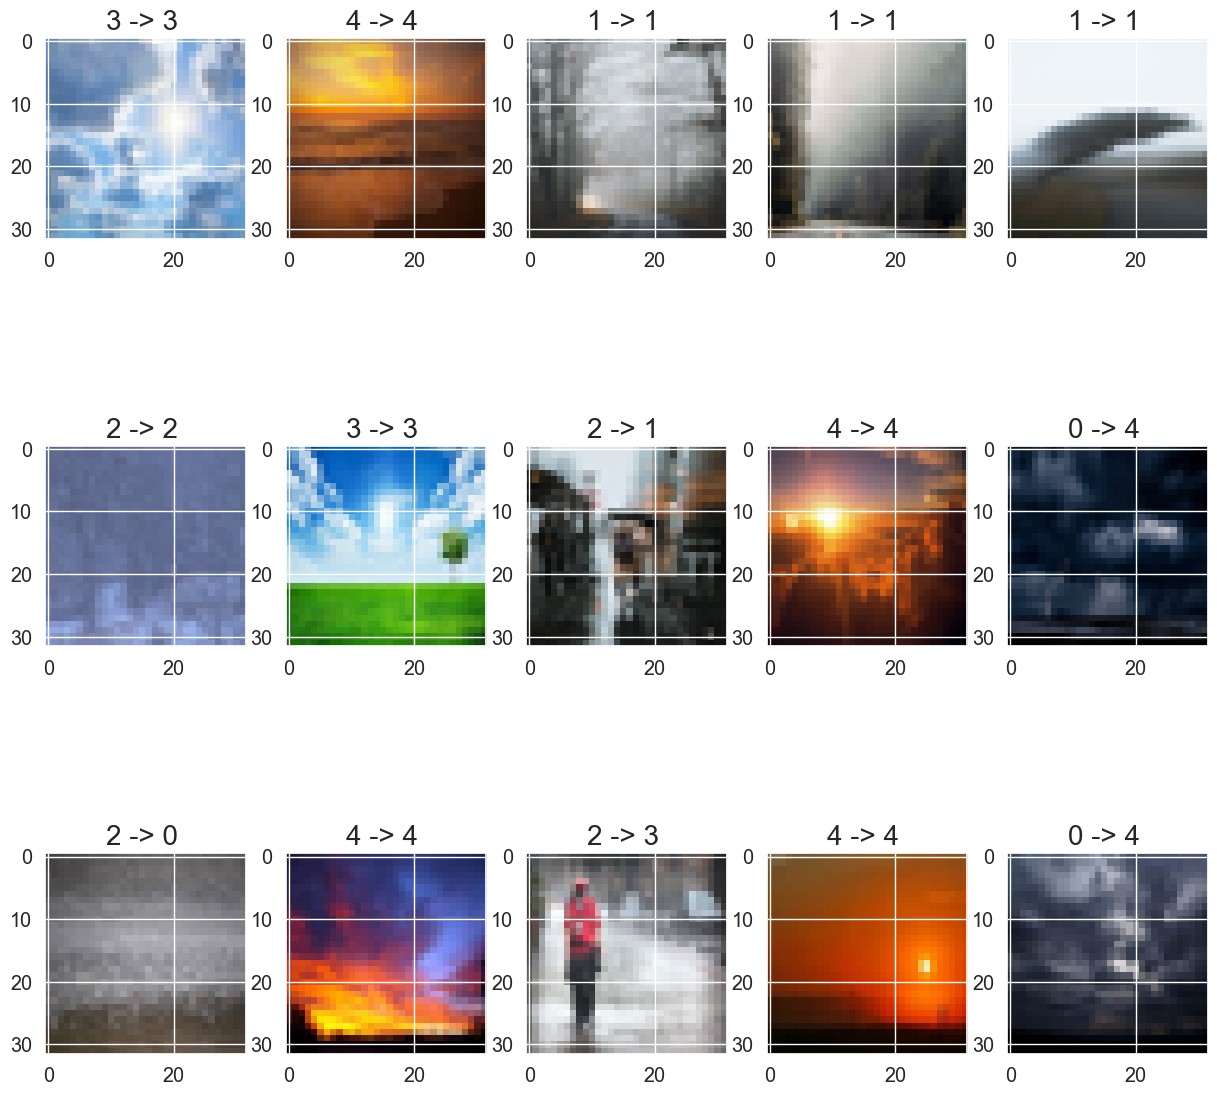

In [44]:
plt.figure(figsize = (15, 15))
for index, (image, actual, pred) in enumerate(zip(test_x, test_y, nb.predict(test_x))):
    plt.subplot(3, 5, index+1)
    plt.imshow(np.reshape(image, (32, 32, 3)))
    plt.title('%d -> %d ' % (actual, pred), fontsize=20)
    plt.plot

# K-Nearest Neighbors (KNN)

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [73]:
params = {
    'n_neighbors': range(1, len(test_y)//2),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

knn = GridSearchCV(KNeighborsClassifier(), params)
knn.fit(train_x, train_y)

c:\Users\shiva\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\shiva\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': range(1, 7),
                         'weights': ['uniform', 'distance']})

In [74]:
print("Actual Result -", test_y)
print("Predicted Result -", knn.predict(test_x))
print("Accuracy -", knn.score(test_x, test_y))

Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted Result - [3 4 1 1 1 2 3 1 4 1 2 4 2 4 1]
Accuracy - 0.8


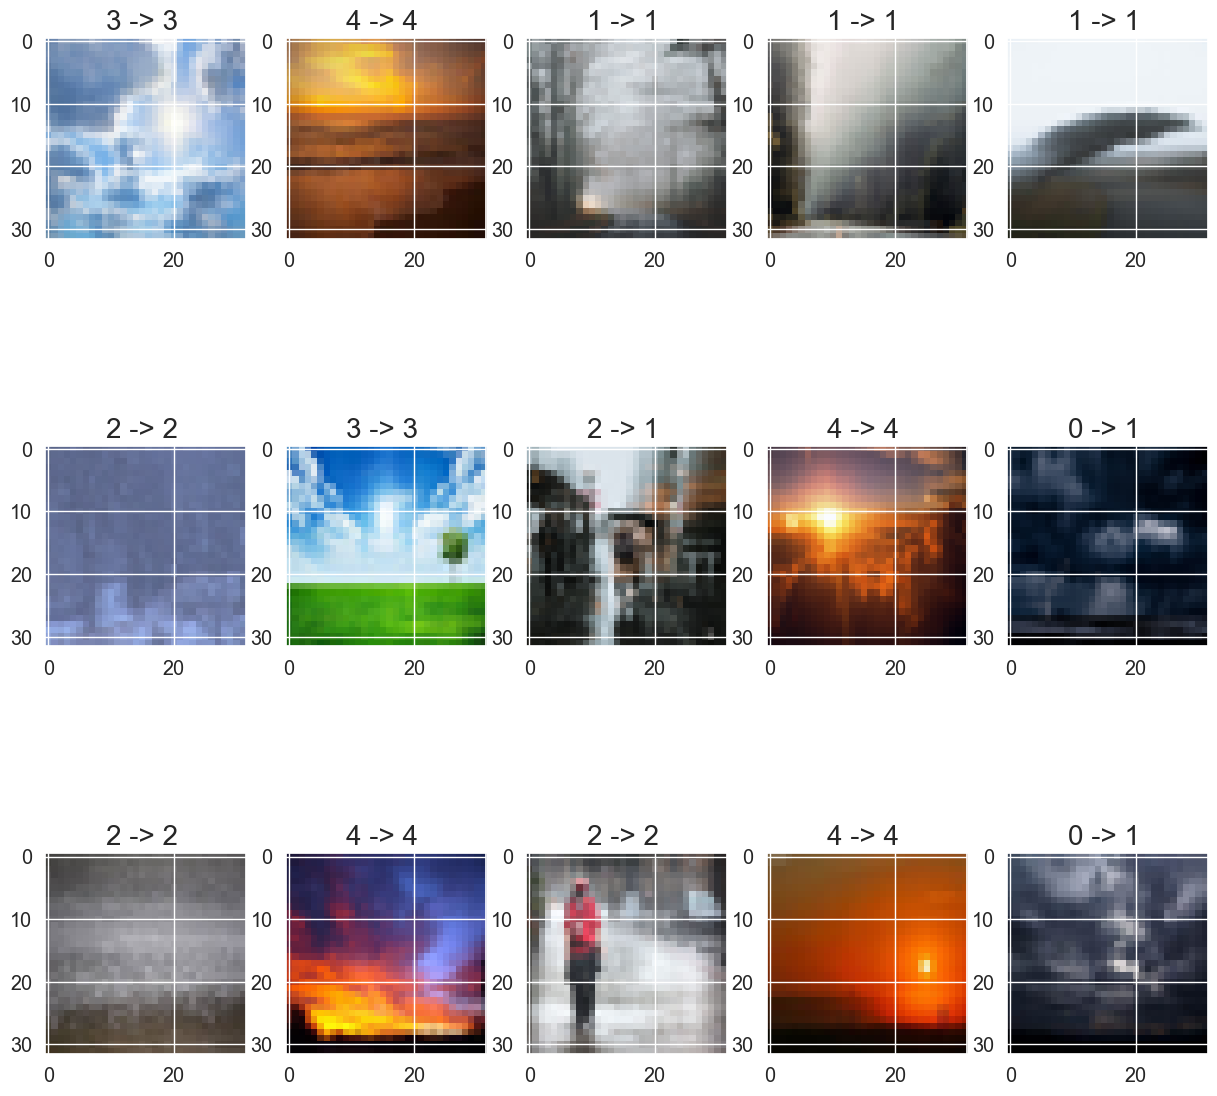

In [75]:
plt.figure(figsize = (15, 15))
for index, (image, actual, pred) in enumerate(zip(test_x, test_y, knn.predict(test_x))):
    plt.subplot(3, 5, index+1)
    plt.imshow(np.reshape(image, (32, 32, 3)))
    plt.title('%d -> %d ' % (actual, pred), fontsize=20)
    plt.plot

# K-Means Clustering

In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [68]:
kmean = KMeans(n_clusters=5)
kmean.fit(train_x)
print("Actual Result -", test_y)
print("Predicted Result -", kmean.predict(test_x))
print("Accuracy -", accuracy_score(kmean.predict(test_x), test_y))

Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted Result - [3 4 1 1 1 0 3 2 4 2 0 2 3 4 2]
Accuracy - 0.6


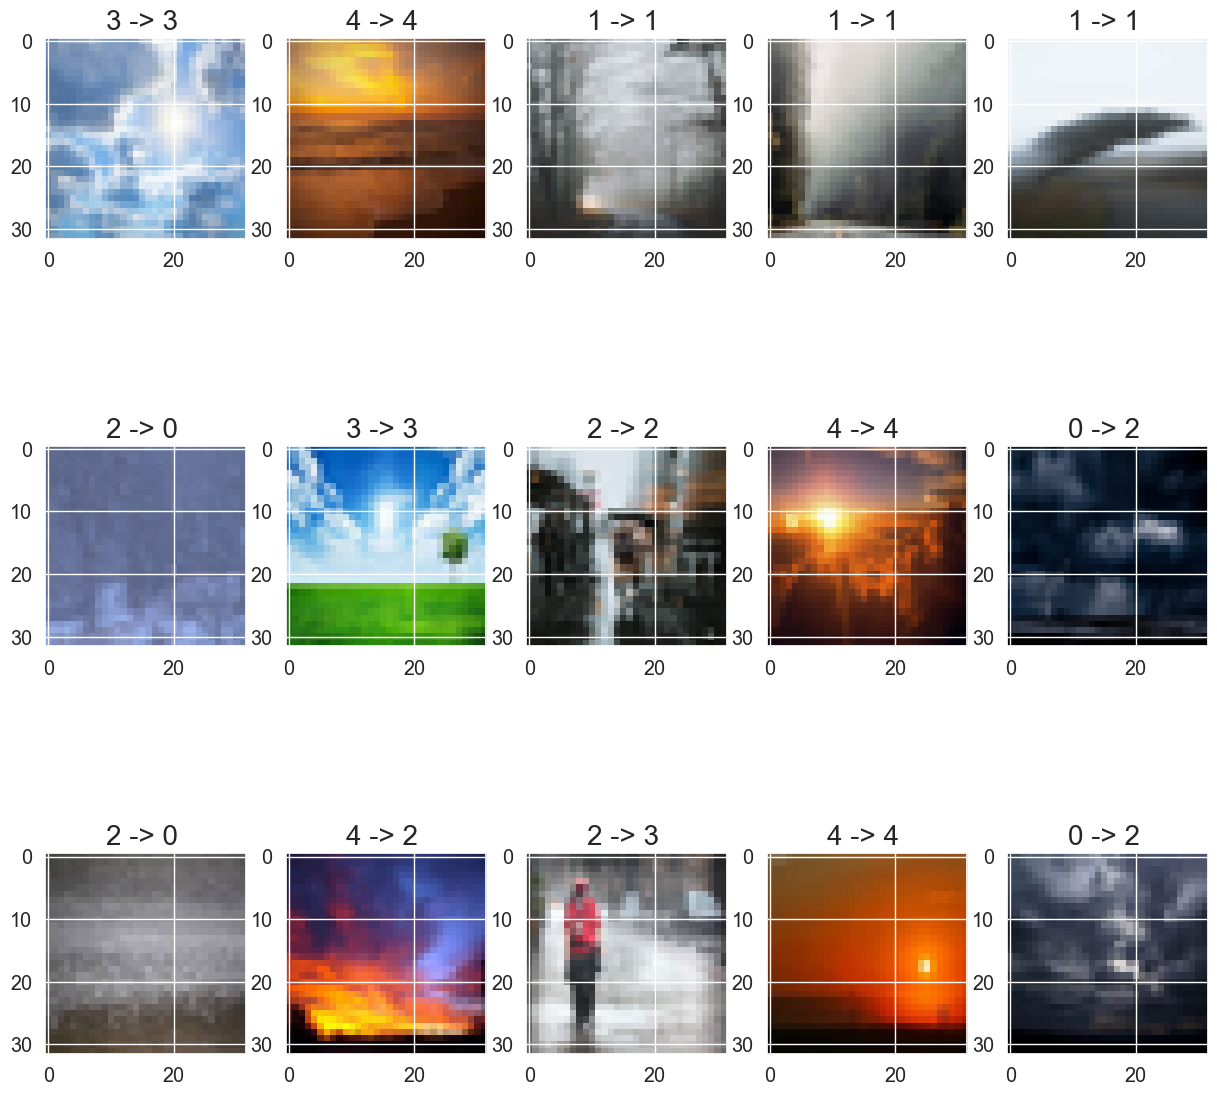

In [69]:
plt.figure(figsize = (15, 15))
for index, (image, actual, pred) in enumerate(zip(test_x, test_y, kmean.predict(test_x))):
    plt.subplot(3, 5, index+1)
    plt.imshow(np.reshape(image, (32, 32, 3)))
    plt.title('%d -> %d ' % (actual, pred), fontsize=20)
    plt.plot

# Perceptron

In [70]:
from sklearn.neural_network import MLPClassifier

In [71]:
mlp = MLPClassifier()
mlp.fit(train_x, train_y)
print("Actual Result -", test_y)
print("Predicted Result -", mlp.predict(test_x))
print("Accuracy -", mlp.score(test_x, test_y))

Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted Result - [3 4 2 1 1 0 3 1 4 0 0 4 2 4 0]
Accuracy - 0.7333333333333333


c:\Users\shiva\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


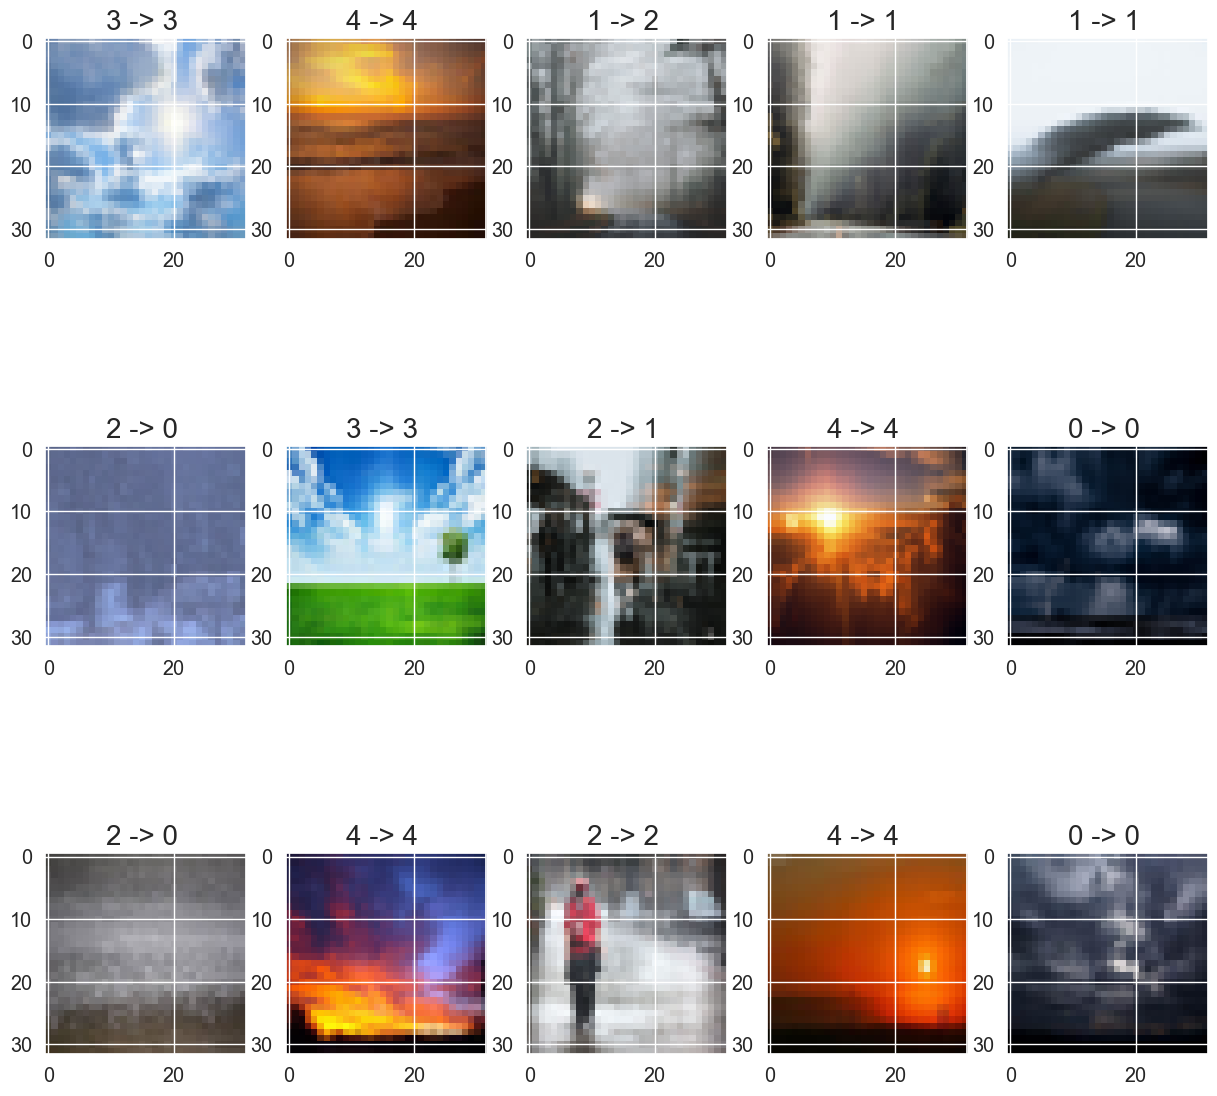

In [72]:
plt.figure(figsize = (15, 15))
for index, (image, actual, pred) in enumerate(zip(test_x, test_y, mlp.predict(test_x))):
    plt.subplot(3, 5, index+1)
    plt.imshow(np.reshape(image, (32, 32, 3)))
    plt.title('%d -> %d ' % (actual, pred), fontsize=20)
    plt.plot

# Accuracy plot

**Prepare Accuracy Data**

In [76]:
accuracy = {
    "lgr\nnewtoncg": lgr_newton.score(test_x, test_y), 
    "lgr\nlbfgs": lgr_lbfgs.score(test_x, test_y), 
    "lgr\nliblinear": lgr_liblinear.score(test_x, test_y), 
    "lgr\nsag": lgr_sag.score(test_x, test_y), 
    "lgr\nsaga": lgr_saga.score(test_x, test_y), 
    "dtc": dtc.score(test_x, test_y), 
    "rfc": rfc.score(test_x, test_y),
    "svc\nlinear": svc_linear.score(test_x, test_y),
    "svc\npoly": svc_poly.score(test_x, test_y),
    "svc\nrbf": svc_rbf.score(test_x, test_y),
    "svc\nsigmoid": svc_sigmoid.score(test_x, test_y),
    "nb": nb.score(test_x, test_y),
    "knn": knn.score(test_x, test_y),
    "kmean": accuracy_score(kmean.predict(test_x), test_y),
    "mlp": mlp.score(test_x, test_y),
    }
x_axis = list(accuracy.keys())
y_axis = list(accuracy.values())

**Comparing accuracy**

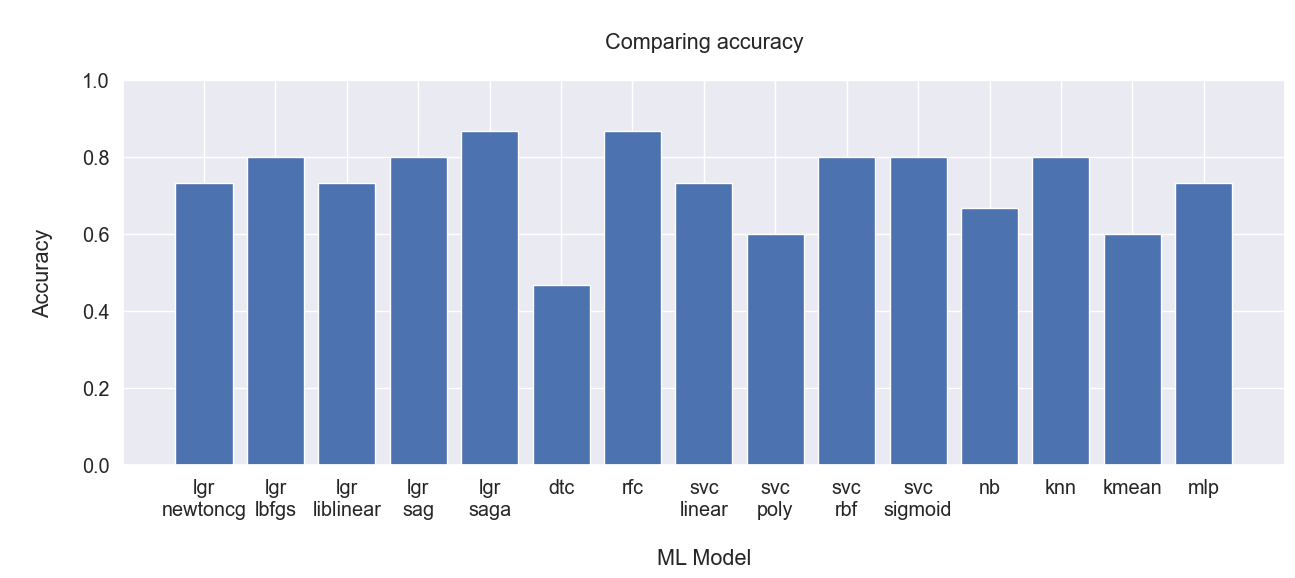

In [81]:
plt.figure(figsize = (15, 5))
plt.bar(x_axis, y_axis)
plt.xlabel("\nML Model")
plt.ylabel("\nAccuracy\n")
plt.title("\nComparing accuracy\n")
plt.ylim(0, 1)
plt.show()